<a href="https://colab.research.google.com/github/saiyuu330/COSE474_Project/blob/main/DL_projecr02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

video_path = '/content/drive/MyDrive/Colab Notebooks/8.mp4'

cap = cv2.VideoCapture(video_path)

In [3]:
def print_nine_image(cap):
  num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  frames_list = []

  for frame_number in range(num_frames):
      ret, frame = cap.read()
      if not ret:
          break

      if frame_number % 15 == 0:
          frames_list.append(frame)

  print("all frame size is", np.array(frames_list).shape)
  cap.release()

  grid_size = (3, 3)
  rows, cols, _ = frames_list[0].shape
  grid_image = np.zeros((rows * grid_size[0], cols * grid_size[1], 3), dtype=np.uint8)

  for i in range(grid_size[0]):
      for j in range(grid_size[1]):
          index = i * grid_size[1] + j
          if index < len(frames_list):
              grid_image[i * rows:(i + 1) * rows, j * cols:(j + 1) * cols] = frames_list[index]

  cv2_imshow(grid_image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

all frame size is (9, 1080, 1920, 3)


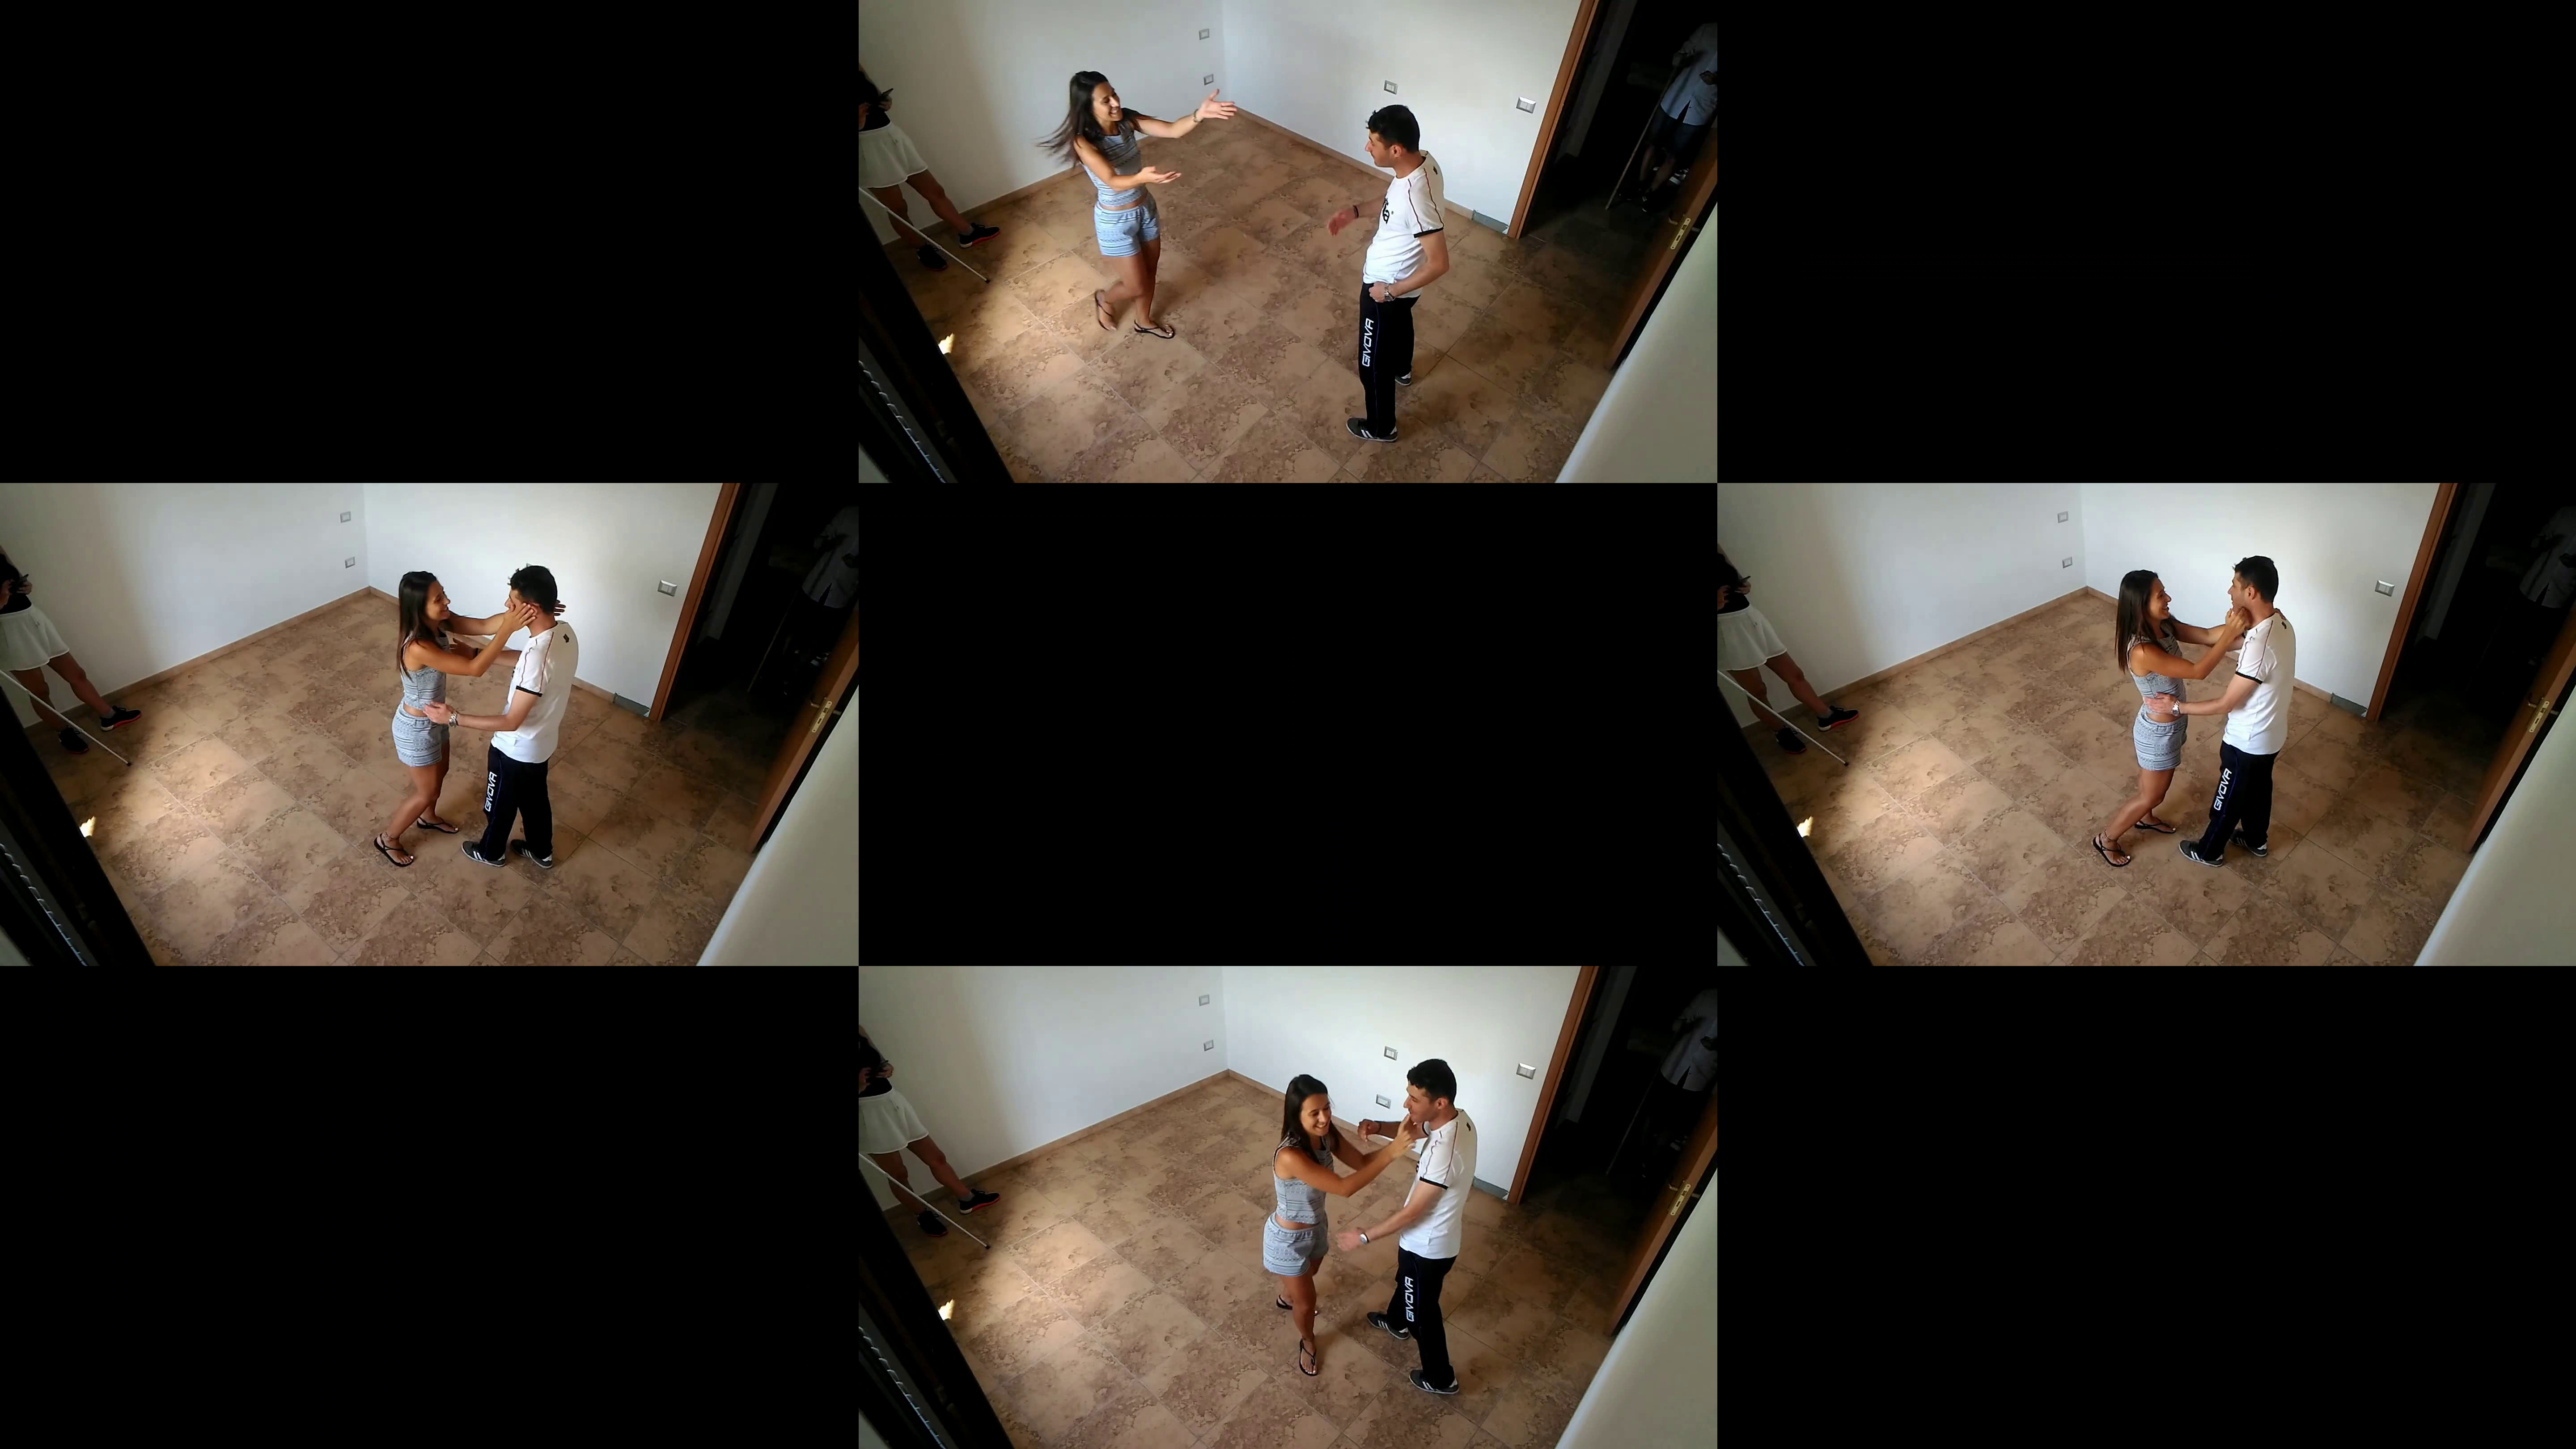

In [4]:
frames_list = []
frame_number = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    if frame_number % 10 == 0:
        frame = np.zeros_like(frame)
    frames_list.append(frame)
    frame_number += 1
cap.release()

output_video_path = '/content/drive/MyDrive/Colab Notebooks/output_video.avi'

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (frames_list[0].shape[1], frames_list[0].shape[0]))

for frame_to_save in frames_list:
    out.write(frame_to_save)

out.release()

recap = cv2.VideoCapture(output_video_path)
print_nine_image(recap)